# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


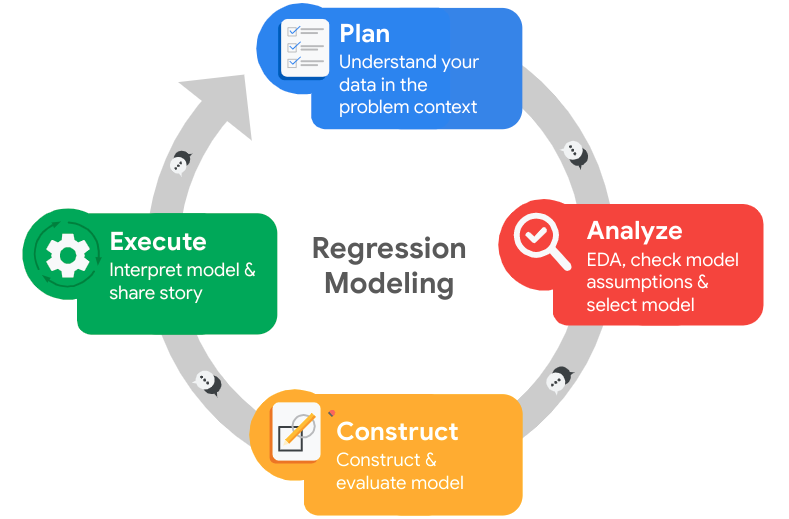

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders are HR and leadership at Salifort Motors.

Trying to predict whether a given employee will leave the company. Additionally, which features seem to have the most impact.

Initial observations:
- there are approximately 1280 outliers for the "time_spend_company" (tenure) field.
    + (outlier classified as + 1.5 times the IQR above the 75th percentile which is 5.5)
    + initially, these outliers were suspected to be mostly ones that left the company because of retirement
    + however, only about 200 of the outliers actually left; indicating that more time spent at the company is
      actually more likely a signal that the employee is less likely to leave the longer they have stayed.
- there are duplicated values but not duplicated records
- there are not any missing values in the dataset.

Resources:
- [data dictionary](https://www.coursera.org/learn/google-advanced-data-analytics-capstone/quiz/PpoWl/create-your-course-7-capstone-project/attempt)
- [Mathworks: types of machine learning models](https://www.mathworks.com/discovery/machine-learning-models.html)
- [SAS: A guide to the types of machine learning algorithms and their applications](https://www.sas.com/en_gb/insights/articles/analytics/machine-learning-algorithms.html)
- [machinelearningmastery.com - A Tour of Machine Learning Algorithms](https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/)

Ethical considerations:
Prioritizing employees who appear to be at risk of leaving may not be fair to employees that are performing well and do not exhibit precursors of turnover. Rather than focusing directly on employees flagged for being at risk of leaving, measures should be undertaken to improve relevant company metrics across the board.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [82]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay


from xgboost import XGBClassifier
from xgboost import plot_importance

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()
# no missing values

print()
print('"left" value counts:')
print(df0["left"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

"left" value counts:
0    11428
1     3571
Name: left, dtype: int64


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={"Department": "department", "Work_accident": "work_accident", "average_montly_hours": "average_monthly_hours"})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
print("df0 shape:")
print(df0.shape)
print()
print("dropped duplicates shape:")
print(df0.drop_duplicates().shape)

df0 shape:
(14999, 10)

dropped duplicates shape:
(11991, 10)


In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
# no true duplicates observed

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
# n/a

### Check outliers

Check for outliers in the data.

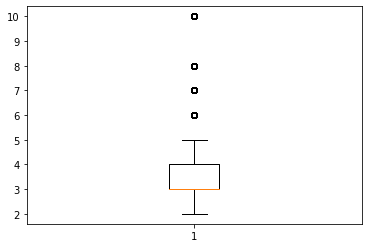

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.boxplot(df0["time_spend_company"])
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# IQR limit calcs
# Calculate 25th percentile of annual strikes
percentile25 = df0['time_spend_company'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = df0['time_spend_company'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

outliers = df0[df0["time_spend_company"] > 5]
print(len(outliers))
print()

outliers["left"].value_counts()

Lower limit is:  1.5
Upper limit is:  5.5
1282



0    1073
1     209
Name: left, dtype: int64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




One of the first major initial observations is that employees with 7 projects appear to have high performance reviews but also look like they tend to have higher turnover rates. 

Employee satisfaction is not normally distributed. Number of projects does appear normally distributed.
Employees with too few projects or too many projects tend to have low satisfaction levels. 

Transformations:
none yet; satisfaction_level and last_evaluation were already normalized between 0 and 1. Perhaps avg_monthly_hours should be normalized



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print('"left" value counts:')
print(df0["left"].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
n = len(df0)
stayed = (df0["left"] == 0).sum()
left = (df0["left"] == 1).sum()
stayed_percent = 100 * stayed / n
left_percent = 100 * left / n
print()
print("Percent stayed: {:.2f}%".format(stayed_percent))
print("Percent left: {:.2f}%".format(left_percent))

"left" value counts:
0    11428
1     3571
Name: left, dtype: int64

Percent stayed: 76.19%
Percent left: 23.81%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

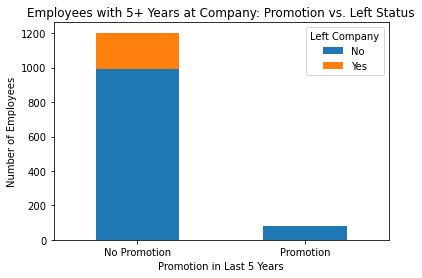

In [14]:
tenure5yrs = df0[df0["time_spend_company"] > 5]
summary = tenure5yrs.groupby(['promotion_last_5years', 'left']).size().unstack(fill_value=0)
summary.plot(kind='bar', stacked=True)
plt.title('Employees with 5+ Years at Company: Promotion vs. Left Status')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Number of Employees')
plt.xticks(ticks=[0, 1], labels=['No Promotion', 'Promotion'], rotation=0)
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.show()

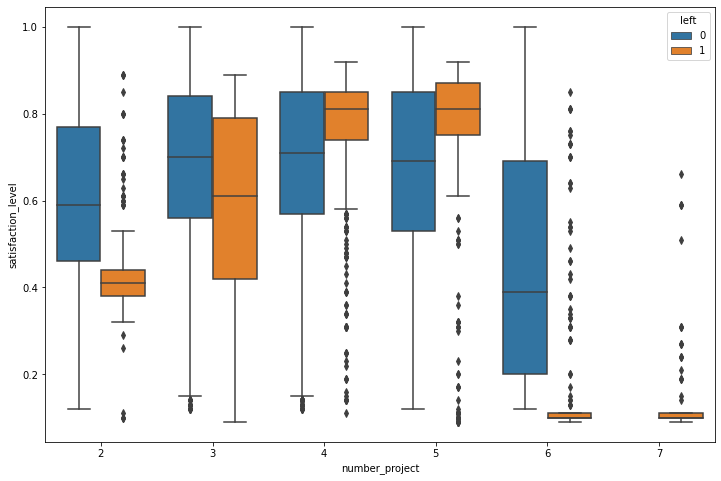

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,8))
sns.boxplot(x=df0["number_project"],y=df0["satisfaction_level"], hue=df0["left"])


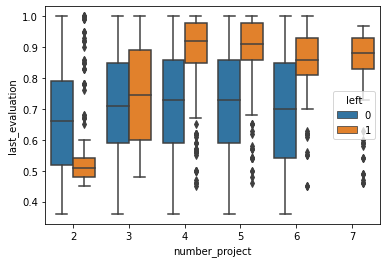

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(x=df0["number_project"],y=df0["last_evaluation"], hue=df0["left"])


Text(0, 0.5, 'satisfaction')

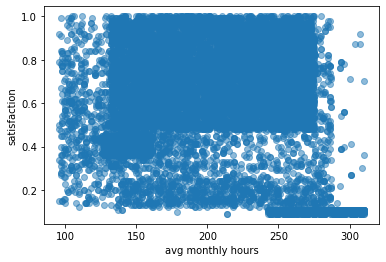

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.scatter(df0["average_monthly_hours"], df0["satisfaction_level"], alpha=0.5)
plt.xlabel("avg monthly hours")
plt.ylabel("satisfaction")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

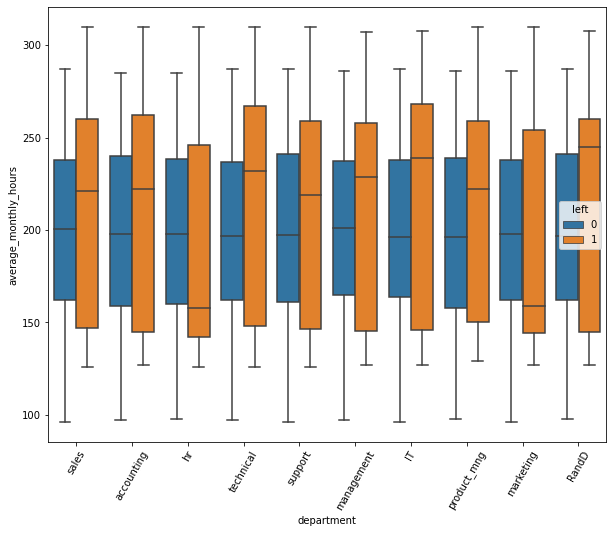

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df0["department"],y=df0["average_monthly_hours"],hue=df0["left"])
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

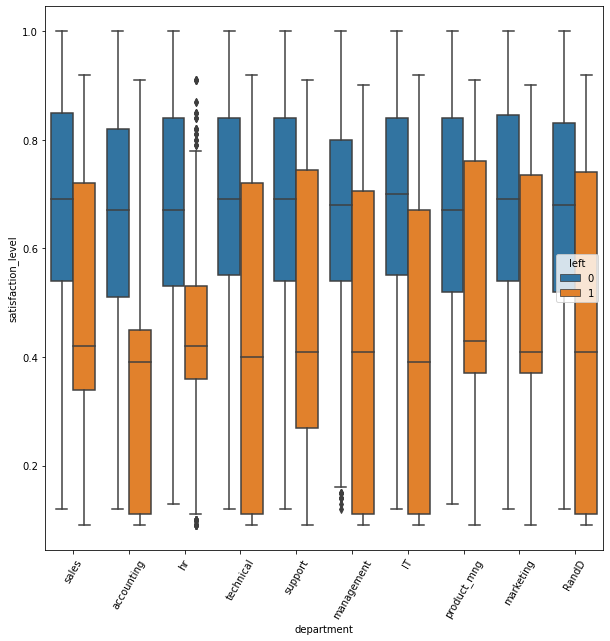

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10,10))
sns.boxplot(x=df0["department"],y=df0["satisfaction_level"], hue=df0["left"])

plt.xticks(rotation=60)



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

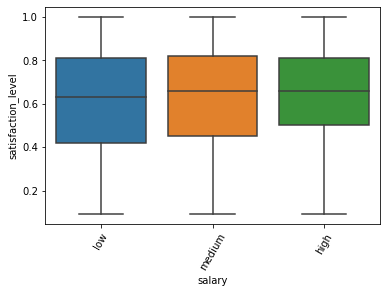

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(x=df0["salary"],y=df0["satisfaction_level"])
plt.xticks(rotation=60)


(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <a list of 10 Patch objects>)

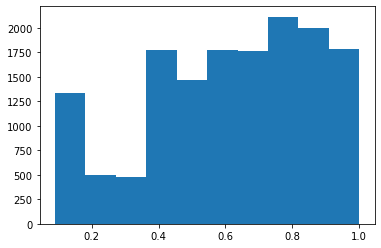

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.hist(df0["satisfaction_level"])


In [22]:
# normalize avg_monthly_hours
df1 = df0

def normalize(df, column_name):
    result = df.copy()
    max_value = df[column_name].max()
    min_value = df[column_name].min()
    result[column_name] = (df[column_name] - min_value) / (max_value - min_value)
    return result

df1 = normalize(df0, "average_monthly_hours")

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,0.285047,3,0,1,0,sales,low
1,0.80,0.86,5,0.775701,6,0,1,0,sales,medium
2,0.11,0.88,7,0.822430,4,0,1,0,sales,medium
3,0.72,0.87,5,0.593458,5,0,1,0,sales,low
4,0.37,0.52,2,0.294393,3,0,1,0,sales,low


In [25]:
#impute tenure outliers
df2 = df1
df2['time_spend_company'] = df2['time_spend_company'].apply(lambda x: 5 if x > 5 else x)
df2.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,0.490889,3.321555,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,0.233379,1.009032,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,0.280374,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,0.485981,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,0.696262,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [27]:
# one-hot encode department and sales variables
df3 = pd.get_dummies(df2, columns=["department", "salary"])
df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,0.285047,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,0.775701,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,0.822430,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,0.593458,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,0.294393,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Insights

- Employees with more projects tend to have higher performance evals. This generally makes sense as good performing employees will get assigned more work. However, employees with 6 and 7 projects have low satisfaction levels indicating they are likely stretched too thin.
- there are slight variations in satisfaction between departments, but there generally do not seem to be issues in satisfaction at the departmental level
- Most departments have more turnover for people working more hours. However, HR and marketing are exceptions.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification. 

### Identify the types of models most appropriate for this task.

Logistic regression, random forest, xgboost

### Modeling

Add as many cells as you need to conduct the modeling process.

In [41]:
### YOUR CODE HERE ###
X = df3.drop("left", axis="columns")
y = df3["left"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = LogisticRegression(verbose=1, solver='liblinear')

model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [42]:
model.coef_

array([[-4.03401457,  0.34861726, -0.42054862,  0.88653248,  0.78464057,
        -1.56096943, -1.28583416, -0.19532215, -0.64785526, -0.05011028,
         0.31680576, -0.3613663 ,  0.08971882, -0.10962488,  0.01383982,
         0.02788104,  0.11529686, -1.31667889,  0.52934747, -0.01340516]])

In [43]:
model.intercept_

array([-0.80073657])

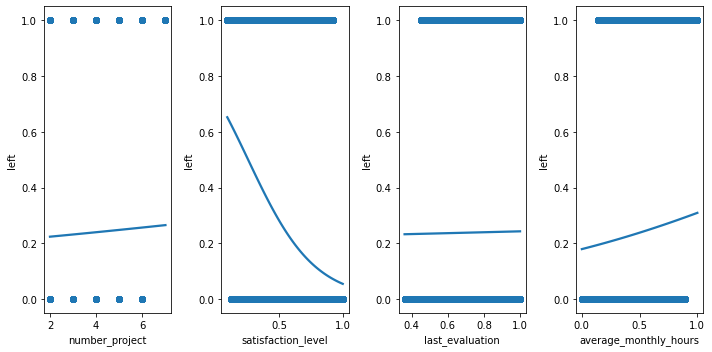

In [52]:
fig, axes = plt.subplots(1,4, figsize=(10,5))
sns.regplot(data=df3, x="number_project", y="left", logistic=True, ci=None, ax=axes[0])
sns.regplot(data=df3, x="satisfaction_level", y="left", logistic=True, ci=None, ax=axes[1])
sns.regplot(data=df3, x="last_evaluation", y="left", logistic=True, ci=None, ax=axes[2])
sns.regplot(data=df3, x="average_monthly_hours", y="left", logistic=True, ci=None, ax=axes[3])
plt.tight_layout()
plt.show()

In [84]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.789000
Precision: 0.587473
Recall: 0.380952
F1 Score: 0.462192


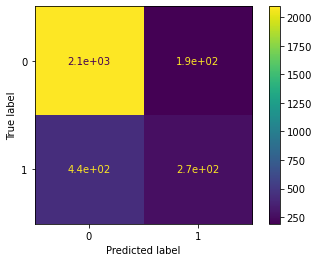

In [83]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()

In [60]:
print(model.score)

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)>


In [62]:
def make_lr_results(model_name:str, model_object, metric:str, y_test, y_pred):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [63]:
def make_cv_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [88]:
results = make_lr_results('Log Reg', model, 'f1', y_test, y_pred)
results

,model,precision,recall,F1,accuracy
0,Log Reg,0.587473,0.380952,0.462192,0.789


In [74]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42, verbose=1)
cv_params = {'n_estimators' : [50,80,100],
             'max_depth' : [10,20,50],
             'min_samples_split' : [1,2],
             'max_features' : ["sqrt", None],
             'max_samples' : [.5,.7,.9]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1',verbose=1)

In [75]:
%%time
rf1.fit(X_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using 

CPU times: user 2min 54s, sys: 2.93 s, total: 2min 57s
Wall time: 2min 57s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [76]:
print(rf1.best_score_)
print(rf1.best_params_)

0.9749717234156511
{'max_depth': 50, 'max_features': 'sqrt', 'max_samples': 0.9, 'min_samples_split': 2, 'n_estimators': 100}


In [89]:
rf_cv_results = make_results('Rand Forest CV', rf1, 'f1')
results = pd.concat([results, rf_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Log Reg,0.587473,0.380952,0.462192,0.789000
0,Rand Forest CV,0.988884,0.961499,0.974972,0.988249


In [78]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [79]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [90]:
rf_test_scores = get_test_scores('Rand Forest test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Log Reg,0.587473,0.380952,0.462192,0.789000
0,Rand Forest CV,0.988884,0.961499,0.974972,0.988249
0,Rand Forest test,0.992775,0.962185,0.977240,0.989333


In [86]:
# XGBoost Classifier

xgb = XGBClassifier(objective='binary:logistic', random_state=0, n_jobs=4)

cv_params = {'learning_rate': [0.1],
             'max_depth': [8,12],
             'min_child_weight': [2],
             'n_estimators': [100,200]
             }

xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1', verbose=2, n_jobs=4)

In [87]:
%%time
xgb1.fit(X_train, y_train, verbose=2)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:   58.6s finished


CPU times: user 9.23 s, sys: 107 ms, total: 9.34 s
Wall time: 1min 3s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                      

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [91]:
xgb1.best_score_

0.9709758995169162

In [92]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 2,
 'n_estimators': 200}

In [93]:
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Log Reg,0.587473,0.380952,0.462192,0.789000
0,Rand Forest CV,0.988884,0.961499,0.974972,0.988249
0,Rand Forest test,0.992775,0.962185,0.977240,0.989333
0,XGB CV,0.981794,0.960448,0.970976,0.986332


In [94]:
xgb_preds = xgb1.best_estimator_.predict(X_test)

xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Log Reg,0.587473,0.380952,0.462192,0.789000
0,Rand Forest CV,0.988884,0.961499,0.974972,0.988249
0,Rand Forest test,0.992775,0.962185,0.977240,0.989333
0,XGB CV,0.981794,0.960448,0.970976,0.986332
0,XGB test,0.985714,0.966387,0.975955,0.988667


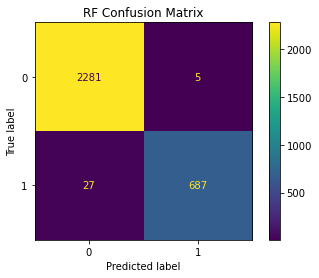

In [108]:
# Random Forest Confusion Matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='')
plt.title("RF Confusion Matrix")
plt.show()

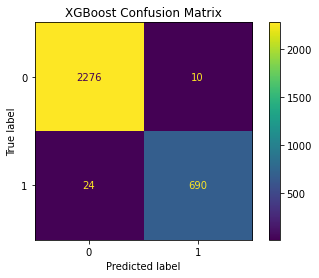

In [107]:
# XGBoost Confusion Matrix
cm = confusion_matrix(y_test, xgb_preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_, 
                             )
disp.plot(values_format='')
plt.title("XGBoost Confusion Matrix")
plt.show()

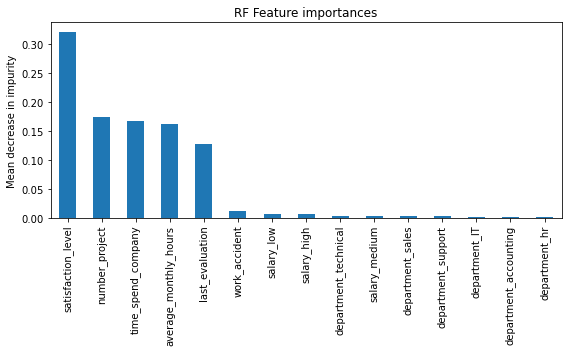

In [99]:
# Random Forest Feature Importance

importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('RF Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

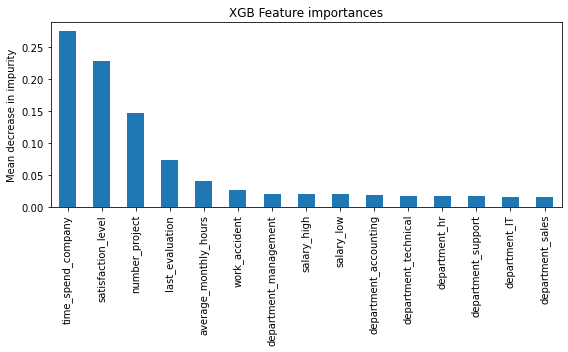

In [100]:
importances = xgb1.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)
xgb_importances = xgb_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
xgb_importances.plot.bar(ax=ax)
ax.set_title('XGB Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The random forest model performed extremely well. While it also performed well on the test data set, the high performance could be a result of overfitting and may not peform as well with new data.

The XGBoost model also performed very well with a slightly higher recall score than the random forest model, and only marginally lower for other score metrics.



### Conclusion, Recommendations, Next Steps

The two models have varying feature importance rankings, but the following fields have high importance in one or both of the models:

- satisfaction level
- number of projects
- tenure
- average monthly hours
- last evaluation 

Further validation should be done because the random forest model performance is susipiciously high. 

Further improvement could be made with some feature engineering. Potential relationships to explore could be last_evaluation <> tenure, last_evaluation <> satisfaction_level, last_evaluation <> num_projects, and see if any other metrics could be derived from a combination of several features such as an efficiency score.

Additional data such as projects completed, other other employee impact measurements. More detailed salary data could potentially help the model identify high performers that are underpaid. More detailed satisfaction information could help such as specific satisfaction metrics such as project satisfaction, manager satisfaction, company benefits satisfaction, etc.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.